In [5]:
import pandas as pd

In [2]:
print("Hallo")

Hallo


# Woche 1 - einfache Backtests

In dieser Session werden wir den Trendfolgeindikator SMA (Simple Moving Average) kennen lernen und diesen nutzen, um einen ersten Backtest zu einer Handelsstrategie zu erstellen.

Wie berechnet man den SMA?

Der Simple Moving Average bezieht sich auf die letzen $n$ Handelsintervalle und beschreibt deren arithmetisches Mittel. 
$SMA(n) =\frac{1}{n} ∑_{i=1}^n p_i$

Das ganze sieht dann wie folgt aus:


In [6]:
#daten einlesen
daten = pd.read_csv('daten_07_05_2020_bis_31_01_2023.csv',index_col="date")

In [7]:
#daten Kopf ausgeben
daten.head(3)

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2023-01-31,84.179104,91.36,88.454400,96.00,84.133034,91.31,87.763350,95.25,403366.869,403366.869
2023-01-30,87.404004,94.86,88.509684,96.06,81.359620,88.30,84.188318,91.37,987138.227,987138.227
2023-01-29,82.612724,89.66,90.085278,97.77,82.603510,89.65,87.385576,94.84,1268331.010,1268331.010


In [8]:
#daten ordnen, sodass weit entfernte Zeitpunkte im Head und nähere Zeitpunkte im Tail liegen
daten = daten.sort_index(axis=0)
daten.head(3)

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2020-05-07,41.389288,44.92,44.429908,48.22,40.882518,44.37,43.646718,47.37,796061.59933,796061.59933
2020-05-08,43.646718,47.37,44.623402,48.43,42.697676,46.34,43.941566,47.69,631882.81036,631882.81036
2020-05-09,43.950780,47.70,45.240740,49.10,43.075450,46.75,43.259730,46.95,656199.99850,656199.99850


In [9]:
#SMA berechnen
daten["SMA_15"] = daten["4a. close (EUR)"].rolling(15).mean()
daten["SMA_10"] = daten["4a. close (EUR)"].rolling(10).mean()     #40 & 15 in Kombination recht gut
daten.tail(3)

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD),SMA_15,SMA_10
date,,,,,,,,,,,,
2023-01-29,82.612724,89.66,90.085278,97.77,82.603510,89.65,87.385576,94.84,1268331.010,1268331.010,81.101014,82.295762
2023-01-30,87.404004,94.86,88.509684,96.06,81.359620,88.30,84.188318,91.37,987138.227,987138.227,81.346720,82.396195
2023-01-31,84.179104,91.36,88.454400,96.00,84.133034,91.31,87.763350,95.25,403366.869,403366.869,81.920445,83.072503


<AxesSubplot: xlabel='date'>

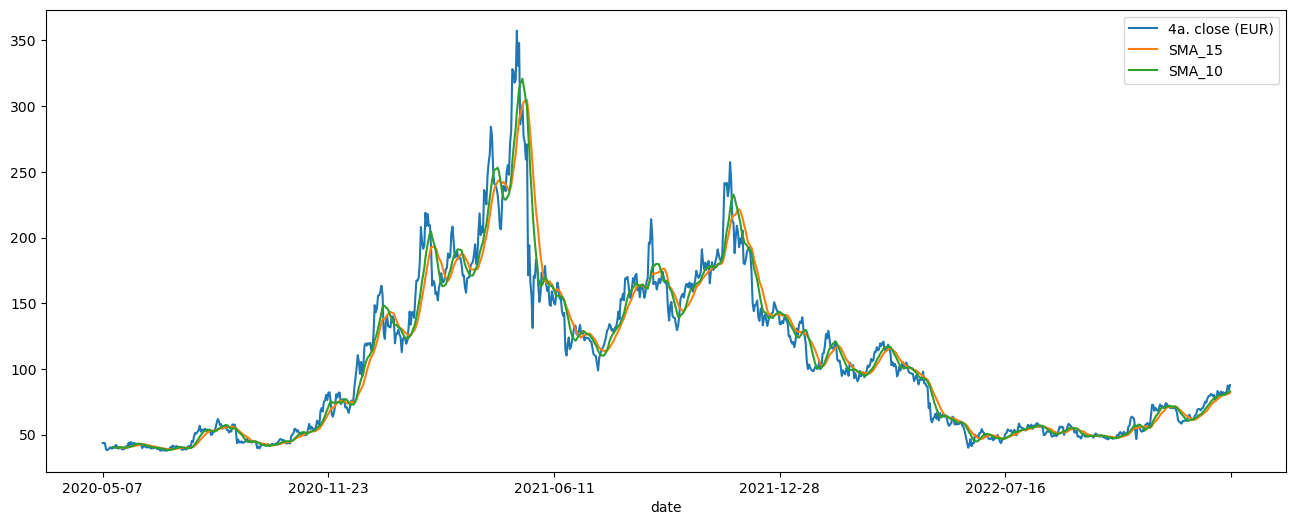

In [10]:
daten[["4a. close (EUR)","SMA_15","SMA_10"]].plot(figsize=(16,6))

In [15]:
#Strategie herleiten und Portfolios bestimmen (einfache Version)
df = daten[["4a. close (EUR)","SMA_15","SMA_10"]].copy()     #erstelle eine neues DataFrame, für die bessere Übersicht

#bestimme die Renditen
df["pct"] = df["4a. close (EUR)"].pct_change().shift(-1)    #time shift ist WICHTIG! einer der häufigsten Fehler, wenn er vergessen wird

df = df.dropna()                                            #NaN Werte herauswerfen ist WICHTIG! Da es ansonsten zu falschen/ungewollten Signalen kommen könnten

# Signal, wenn wir mit dem Schlusskurs über dem SMA liegen
df["Sig_15"] = df["4a. close (EUR)"] > df["SMA_15"]
df["Sig_10"] = (df["4a. close (EUR)"] > df["SMA_10"])       
df.head(3)

,4a. close (EUR),SMA_15,SMA_10,pct,Sig_15,Sig_10
date,,,,,,
2020-05-21,39.371422,40.704381,40.271630,0.035104,False,False
2020-05-22,40.753522,40.511501,40.460517,-0.008591,True,True
2020-05-23,40.403390,40.275623,40.522251,-0.040365,True,False


In [25]:
#bestimme die Portfolios
df["PF_15"] = df["Sig_15"] * df["pct"]
df["myPF_15"] = (df["PF_15"] +1).cumprod()

df["PF_10"] = df["Sig_10"] * df["pct"]
df["myPF_10"] = (df["PF_10"] +1).cumprod()

df["PF_BM"] =  df["pct"]
df["myPF_BM"] = (df["PF_BM"] +1).cumprod()
df.tail()

,4a. close (EUR),SMA_15,SMA_10,pct,Sig_15,Sig_10,PF_15,myPF_15,PF_10,myPF_10,PF_BM,myPF_BM
date,,,,,,,,,,,,
2023-01-26,80.640928,80.287725,80.494425,0.015654,True,True,0.015654,3.732442,0.015654,3.424820,0.015654,2.080271
2023-01-27,81.903246,80.459719,80.666727,0.008775,True,True,0.008775,3.765194,0.008775,3.454872,0.008775,2.098526
2023-01-28,82.621938,80.671027,81.316314,0.057656,True,True,0.057656,3.982279,0.057656,3.654066,0.057656,2.219518
2023-01-29,87.385576,81.101014,82.295762,-0.036588,True,True,-0.036588,3.836576,-0.036588,3.520371,-0.036588,2.138310
2023-01-30,84.188318,81.346720,82.396195,0.042465,True,True,0.042465,3.999495,0.042465,3.669863,0.042465,2.229113


<AxesSubplot: xlabel='date'>

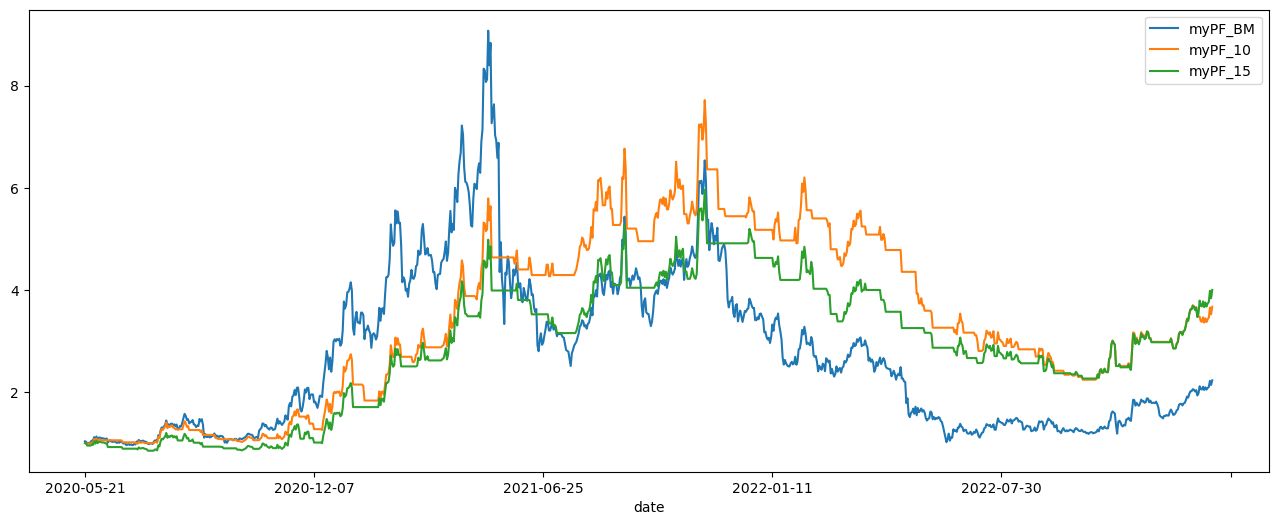

In [21]:
df[["myPF_BM", "myPF_10", "myPF_15"]].plot(figsize=(16,6))

In [10]:
#I. TODO:
# Probiere die beiden Signale SMA_15 und SMA_10 zu kombinieren.
# FRAGEN: 
#   1. Was bedeutet das neue Signal? Wann haben wir ein Kaufsignal und wann sind wir in EUR?
#   2. Plotte die Performance. Was fällt dir auf?

#II. TODO:
# Bestimme den "Gegenspieler" zum SMA_15, dieser soll immer dann investiert sein, wenn wir mit dem Close Preis unter dem SMA liegen.
# FRAGEN:
#   1. Plotte die Performance. Was fällt dir auf?
#   2. Ist der "Gegenspieler" zum SMA_15 (historisch) gesehen ein guter Signalgeber? Würdest du diesen für deine Analyse benutzen?

In [31]:
#I. TODO Code zur Lösung:
df["PF_komb"] = df["Sig_10"] * df["Sig_15"] * df["pct"] # also wenn beide Signale true sind
df["myPF_komb"] = (df["PF_komb"] +1).cumprod()
df.tail()

,4a. close (EUR),SMA_15,SMA_10,pct,Sig_15,Sig_10,PF_15,myPF_15,PF_10,myPF_10,PF_BM,myPF_BM,PF_komb,myPF_komb
date,,,,,,,,,,,,,,
2023-01-26,80.640928,80.287725,80.494425,0.015654,True,True,0.015654,3.732442,0.015654,3.424820,0.015654,2.080271,0.015654,4.522560
2023-01-27,81.903246,80.459719,80.666727,0.008775,True,True,0.008775,3.765194,0.008775,3.454872,0.008775,2.098526,0.008775,4.562245
2023-01-28,82.621938,80.671027,81.316314,0.057656,True,True,0.057656,3.982279,0.057656,3.654066,0.057656,2.219518,0.057656,4.825285
2023-01-29,87.385576,81.101014,82.295762,-0.036588,True,True,-0.036588,3.836576,-0.036588,3.520371,-0.036588,2.138310,-0.036588,4.648738
2023-01-30,84.188318,81.346720,82.396195,0.042465,True,True,0.042465,3.999495,0.042465,3.669863,0.042465,2.229113,0.042465,4.846145


<AxesSubplot: xlabel='date'>

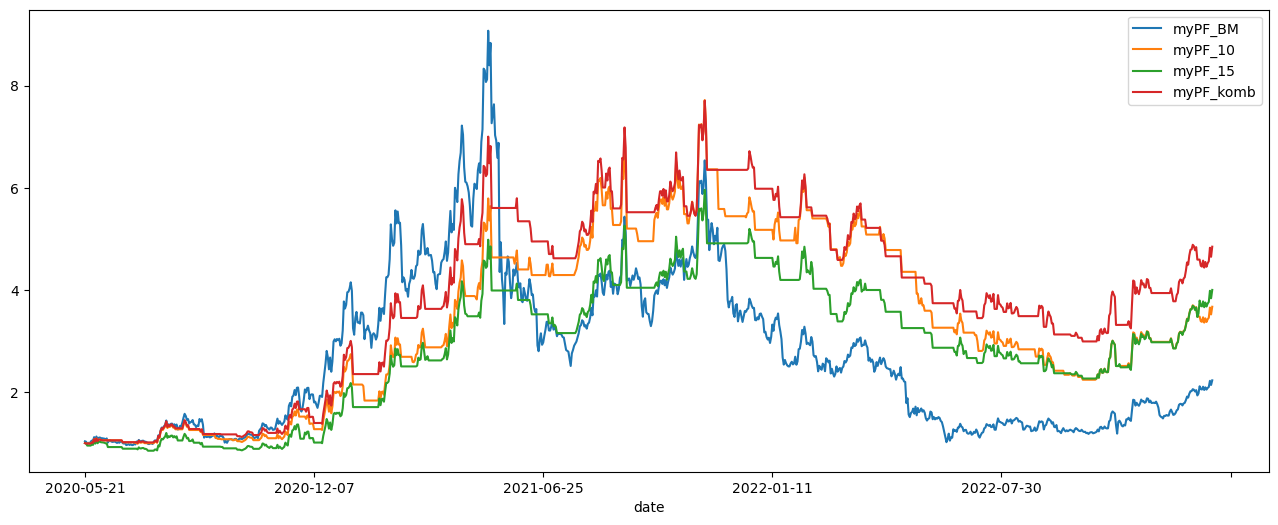

In [30]:
df[["myPF_BM", "myPF_10", "myPF_15", "myPF_komb"]].plot(figsize=(16,6))
# Leistung ist besser
# das kombinierte PF outperformt, weil beide Durschnitte berücksichtig werden (also mehr Indikatoren)


<AxesSubplot: xlabel='date'>

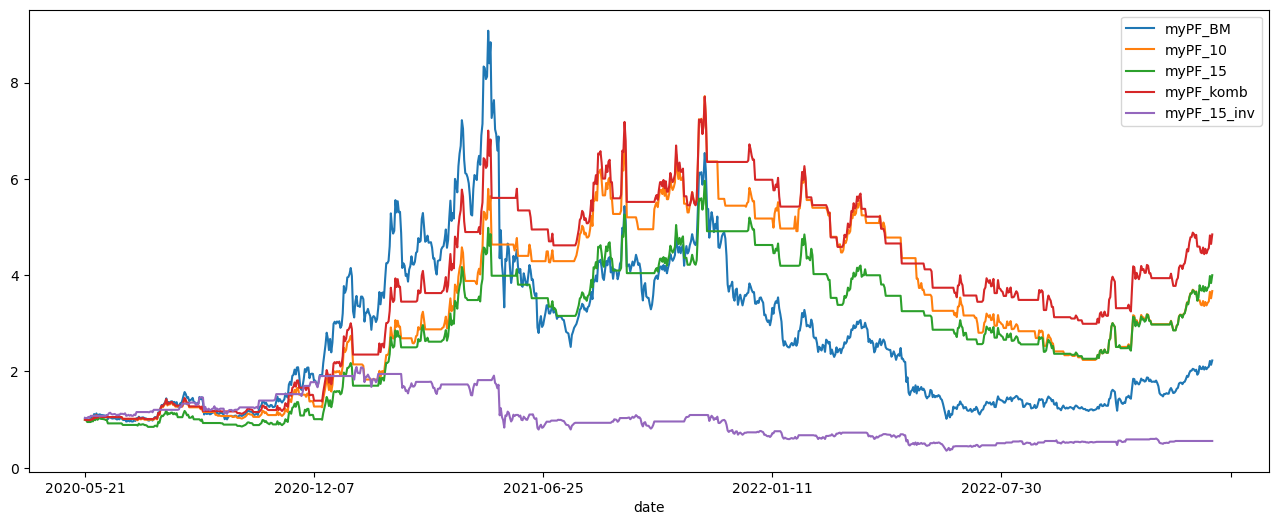

In [33]:
#II. TODO Code zur Lösung:

df["Sig_15_inv"] = df["4a. close (EUR)"] <= df["SMA_15"]
df["PF_15_inv"] = df["Sig_15_inv"] * df["pct"]
df["myPF_15_inv"] = (df["PF_15_inv"] +1).cumprod()

df[["myPF_BM", "myPF_10", "myPF_15", "myPF_komb", "myPF_15_inv"]].plot(figsize=(16,6))
# der invertierte ist schlechter, da wir eine pessimistischere Strategie gewählt haben (alle Daten unter dem Durchschnitt berücksichtigen)

### Ausblick für die zweite Woche

- Python-Funktionen
- RSI
- Risiko Kennzahlen

### Ausblick für die dritte Woche
- Machine Learning Einführung (Regression & Decission Trees)
- Training- & Testdatensets
- R^2 beim Fitting

### Ausblick vierte Woche
- OBV Indikator
- Bot-Setup

- Ausblick Trading-Competition hosted by GetaBot